In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [84]:
df=pd.read_csv("developer_survey_2020/survey_results_public.csv")

In [105]:
df.columns

Index(['Respondent', 'MainBranch', 'Hobbyist', 'Age', 'Age1stCode', 'CompFreq',
       'CompTotal', 'ConvertedComp', 'Country', 'CurrencyDesc',
       'CurrencySymbol', 'DatabaseDesireNextYear', 'DatabaseWorkedWith',
       'DevType', 'EdLevel', 'Employment', 'Ethnicity', 'Gender', 'JobFactors',
       'JobSat', 'JobSeek', 'LanguageDesireNextYear', 'LanguageWorkedWith',
       'MiscTechDesireNextYear', 'MiscTechWorkedWith',
       'NEWCollabToolsDesireNextYear', 'NEWCollabToolsWorkedWith', 'NEWDevOps',
       'NEWDevOpsImpt', 'NEWEdImpt', 'NEWJobHunt', 'NEWJobHuntResearch',
       'NEWLearn', 'NEWOffTopic', 'NEWOnboardGood', 'NEWOtherComms',
       'NEWOvertime', 'NEWPurchaseResearch', 'NEWPurpleLink', 'NEWSOSites',
       'NEWStuck', 'OpSys', 'OrgSize', 'PlatformDesireNextYear',
       'PlatformWorkedWith', 'PurchaseWhat', 'Sexuality', 'SOAccount',
       'SOComm', 'SOPartFreq', 'SOVisitFreq', 'SurveyEase', 'SurveyLength',
       'Trans', 'UndergradMajor', 'WebframeDesireNextYear',
  

In [106]:
df_new = df[['Country','EdLevel','YearsCode','Employment','ConvertedComp']]
df_new = df_new.rename({'ConvertedComp':'Salary'},axis=1)
df_new.tail()

,Country,EdLevel,YearsCode,Employment,Salary
64456,United States,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",10,Employed full-time,NaN
64457,Morocco,NaN,NaN,Employed full-time,NaN
64458,Viet Nam,Primary/elementary school,NaN,NaN,NaN
64459,Poland,NaN,NaN,Employed full-time,NaN
64460,Spain,"Other doctoral degree (Ph.D., Ed.D., etc.)",NaN,Employed full-time,NaN


In [107]:
df_new=df_new[df_new['Salary'].notnull()]
df_new.head()

,Country,EdLevel,YearsCode,Employment,Salary
7,United States,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",17,Employed full-time,116000.0
9,United Kingdom,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",8,Employed full-time,32315.0
10,United Kingdom,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",10,Employed full-time,40070.0
11,Spain,Some college/university study without earning ...,7,Employed full-time,14268.0
12,Netherlands,"Secondary school (e.g. American high school, G...",35,Employed full-time,38916.0


In [108]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34756 entries, 7 to 64154
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Country     34756 non-null  object 
 1   EdLevel     34188 non-null  object 
 2   YearsCode   34630 non-null  object 
 3   Employment  34717 non-null  object 
 4   Salary      34756 non-null  float64
dtypes: float64(1), object(4)
memory usage: 1.6+ MB


In [109]:
df_new = df_new.dropna()
df_new.isnull().sum()

Country       0
EdLevel       0
YearsCode     0
Employment    0
Salary        0
dtype: int64

In [110]:
df_new = df_new[df_new['Employment']=='Employed full-time']
df_new = df_new.drop('Employment',axis=1)
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30024 entries, 7 to 64154
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Country    30024 non-null  object 
 1   EdLevel    30024 non-null  object 
 2   YearsCode  30024 non-null  object 
 3   Salary     30024 non-null  float64
dtypes: float64(1), object(3)
memory usage: 1.1+ MB


In [111]:
df_new['Country'].value_counts()

United States                       7565
India                               2432
United Kingdom                      2289
Germany                             1903
Canada                              1180
                                    ... 
Saint Vincent and the Grenadines       1
Belize                                 1
Turkmenistan                           1
Yemen                                  1
Namibia                                1
Name: Country, Length: 154, dtype: int64

In [112]:
def shorten_categories(cat,cutoff):
    category_map = {}

    for i in range(len(cat)):
        if cat.values[i]>= cutoff:
            category_map[cat.index[i]]=cat.index[i]
        else:
            category_map[cat.index[i]]='Other'
    
    return category_map

In [113]:
country_map = shorten_categories(df_new.Country.value_counts(),400)
df_new['Country'] = df_new['Country'].map(country_map)
df_new['Country'].value_counts()

Other                 8552
United States         7565
India                 2432
United Kingdom        2289
Germany               1903
Canada                1180
Brazil                 990
France                 970
Spain                  668
Australia              658
Netherlands            655
Poland                 567
Italy                  560
Russian Federation     521
Sweden                 514
Name: Country, dtype: int64

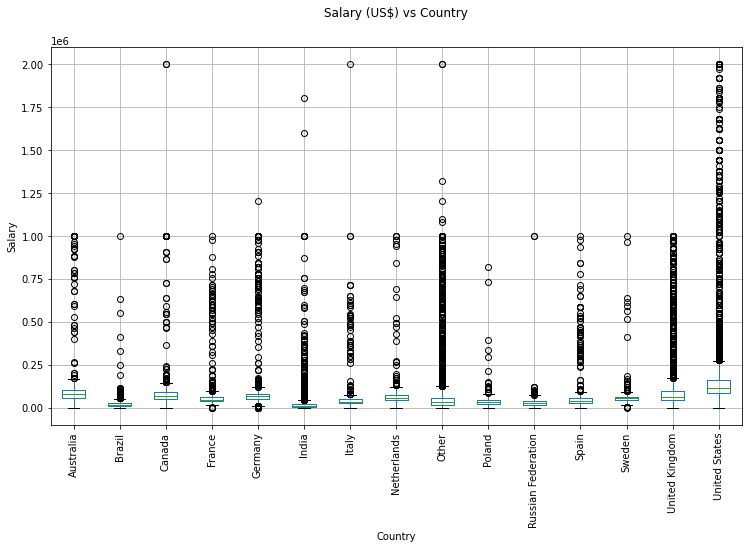

In [114]:
fig , ax = plt.subplots(1,1,figsize=(12,7))
df_new.boxplot('Salary','Country',ax=ax)
plt.title('')
plt.suptitle('Salary (US$) vs Country')
plt.ylabel('Salary')
plt.xticks(rotation=90);

In [115]:
df_new = df_new[df_new['Salary']<=250000]
df_new = df_new[df_new['Salary']>=10000]
df_new = df_new[df_new['Country']!='Other']

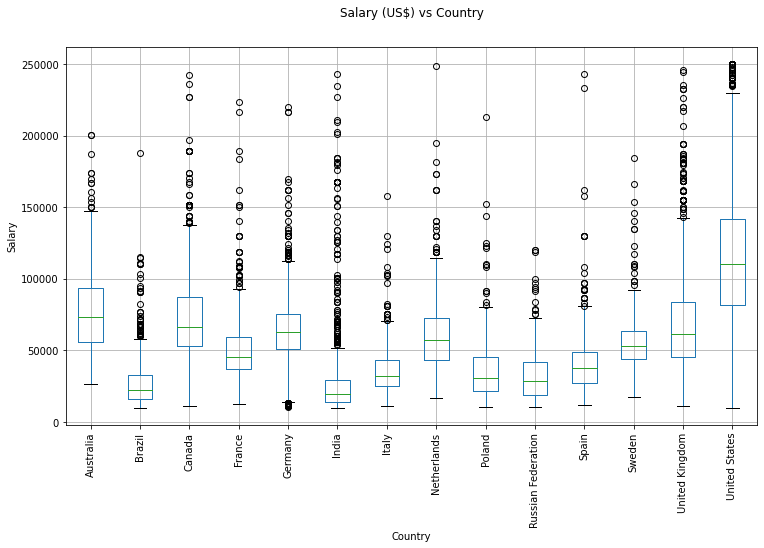

In [116]:
fig , ax = plt.subplots(1,1,figsize=(12,7))
df_new.boxplot('Salary','Country',ax=ax)
plt.title('')
plt.suptitle('Salary (US$) vs Country')
plt.ylabel('Salary')
plt.xticks(rotation=90);

In [117]:
df_new['YearsCode'].unique()

array(['17', '8', '10', '7', '35', '5', '9', '30', '4', '19', '20', '25',
       '16', '36', '6', '43', '23', '11', '38', '24', '21', '37', '40',
       '15', '27', '12', '13', '3', '33', '22', '18', '14', '32', '44',
       '26', '42', '2', '28', '31', '29', '1', '41', '47', '34',
       'More than 50 years', '39', '46', '45', 'Less than 1 year', '50',
       '49', '48'], dtype=object)

In [118]:
def clean_experience(x):
    if x == 'More than 50 years':
        return 50
    if x=='Less than 1 year':
        return 0.5
    else:
        return float(x)
    
df_new['YearsCode'] = df_new['YearsCode'].apply(clean_experience)    

In [119]:
df_new['EdLevel'].unique()

array(['Bachelor’s degree (B.A., B.S., B.Eng., etc.)',
       'Master’s degree (M.A., M.S., M.Eng., MBA, etc.)',
       'Some college/university study without earning a degree',
       'Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)',
       'Associate degree (A.A., A.S., etc.)',
       'Professional degree (JD, MD, etc.)',
       'Other doctoral degree (Ph.D., Ed.D., etc.)',
       'I never completed any formal education',
       'Primary/elementary school'], dtype=object)

In [120]:
def clean_degree(x):
    if "Bachelor’s degree" in x:
        return "Bachelor’s degree"
    if "Master’s degree" in x:
        return "Master’s degree"
    if "Professional degree" in x or "Other doctoral" in x:
        return "Post grad"
    else:
        return "Less than a Bachelor’s"
    
df_new['EdLevel'] = df_new['EdLevel'].apply(clean_degree)    

In [121]:
df_new['EdLevel'].unique()

array(['Bachelor’s degree', 'Master’s degree', 'Less than a Bachelor’s',
       'Post grad'], dtype=object)

In [122]:
from sklearn.preprocessing import LabelEncoder
le_education = LabelEncoder()
df_new['EdLevel']= le_education.fit_transform(df_new['EdLevel'])
df_new['EdLevel'].unique()

array([0, 2, 1, 3])

In [123]:
le_country = LabelEncoder()
df_new['Country']= le_country.fit_transform(df_new['Country'])
df_new['Country'].unique()

array([13, 12, 10,  7,  4,  2,  6,  1,  3,  5, 11,  8,  0,  9])

In [124]:
X = df_new.drop('Salary',axis=1)
y = df_new['Salary']

In [127]:
from sklearn.linear_model import LinearRegression
linear_reg = LinearRegression()
linear_reg.fit(X,y)

LinearRegression()

In [128]:
y_pred = linear_reg.predict(X)

In [131]:
from sklearn.metrics import mean_squared_error
import numpy as np
error = np.sqrt(mean_squared_error(y,y_pred))
error

39602.711897376365

In [132]:
from sklearn.tree import  DecisionTreeRegressor
dec_tree_reg = DecisionTreeRegressor(random_state=0)
dec_tree_reg.fit(X,y)


DecisionTreeRegressor(random_state=0)

In [133]:
y_pred = dec_tree_reg.predict(X)

In [135]:
error = np.sqrt(mean_squared_error(y,y_pred))
print("${:,.02f}".format(error))

$30,263.97


In [136]:
from sklearn.ensemble import RandomForestRegressor
ran_for_reg = RandomForestRegressor(random_state=0)
ran_for_reg.fit(X,y)

RandomForestRegressor(random_state=0)

In [138]:
y_pred = ran_for_reg.predict(X)
error = np.sqrt(mean_squared_error(y,y_pred))
print("${:,.02f}".format(error))

$30,325.32


In [143]:
from sklearn.model_selection import GridSearchCV

max_depth = [None,2,4,6,8,10,12]
parameters = {'max_depth':max_depth}

regressor = DecisionTreeRegressor(random_state=0)

gs = GridSearchCV(regressor,parameters, scoring="neg_mean_squared_error")

gs.fit(X,y)

GridSearchCV(estimator=DecisionTreeRegressor(random_state=0),
             param_grid={'max_depth': [None, 2, 4, 6, 8, 10, 12]},
             scoring='neg_mean_squared_error')

In [145]:
regressor = gs.best_estimator_

regressor.fit(X,y)

y_pred = regressor.predict(X)
error = np.sqrt(mean_squared_error(y,y_pred))
print("${:,.02f}".format(error))

$31,228.59


In [153]:
X.head()

,Country,EdLevel,YearsCode
7,13,0,17.0
9,12,2,8.0
10,12,0,10.0
11,10,1,7.0
12,7,1,35.0


In [155]:
X = np.array([["United States","Master’s degree",15]])
X

array([['United States', 'Master’s degree', '15']], dtype='<U15')

In [157]:
X[:,0]=le_country.transform(X[:,0])
X[:,1]=le_education.transform(X[:,1])
X = X.astype(float)
X

array([[13.,  2., 15.]])

In [158]:
y_pred = regressor.predict(X)
y_pred

array([125580.06666667])

In [159]:
import pickle

In [160]:
data = {"model":regressor,"le_country":le_country,"le_education":le_education}
with open('saved_steps.pkl','wb') as file:
    pickle.dump(data,file)

In [161]:
with open('saved_steps.pkl','rb') as file:
    data = pickle.load(file)

In [163]:
regressor_loaded = data['model']
le_country = data['le_country']
le_education = data['le_education']

In [166]:
y_pred = regressor_loaded.predict(X)
y_pred

array([125580.06666667])